# QUELLE  ÉVOLUTION DES PRÊTS ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 15-02-2025 à 10h48


In [3]:
db_conn = DbConn().create_engine()

In [4]:
query="""SELECT issuedate,cardnumber
FROM statdb.stat_issues si 
WHERE YEAR(issuedate)>='2019'"""

In [5]:
prets_lgp = pd.read_sql(query,db_conn)

In [6]:
df = EvolutionActivite(df=prets_lgp,df_subject='prets_lagrandplage',text='prêts')

In [7]:
df.add_columns()

In [8]:
df1 = df.evolution_byweek_thisyear()
df2 = df.evolution_4lastweek()
df3 = df.evolution_by_year()
df4 = df.distinct_evolution_byweek_thisyear()
df5 = df.distinct_evolution_4lastweek()
df6 = df.distinct_evolution_by_year()

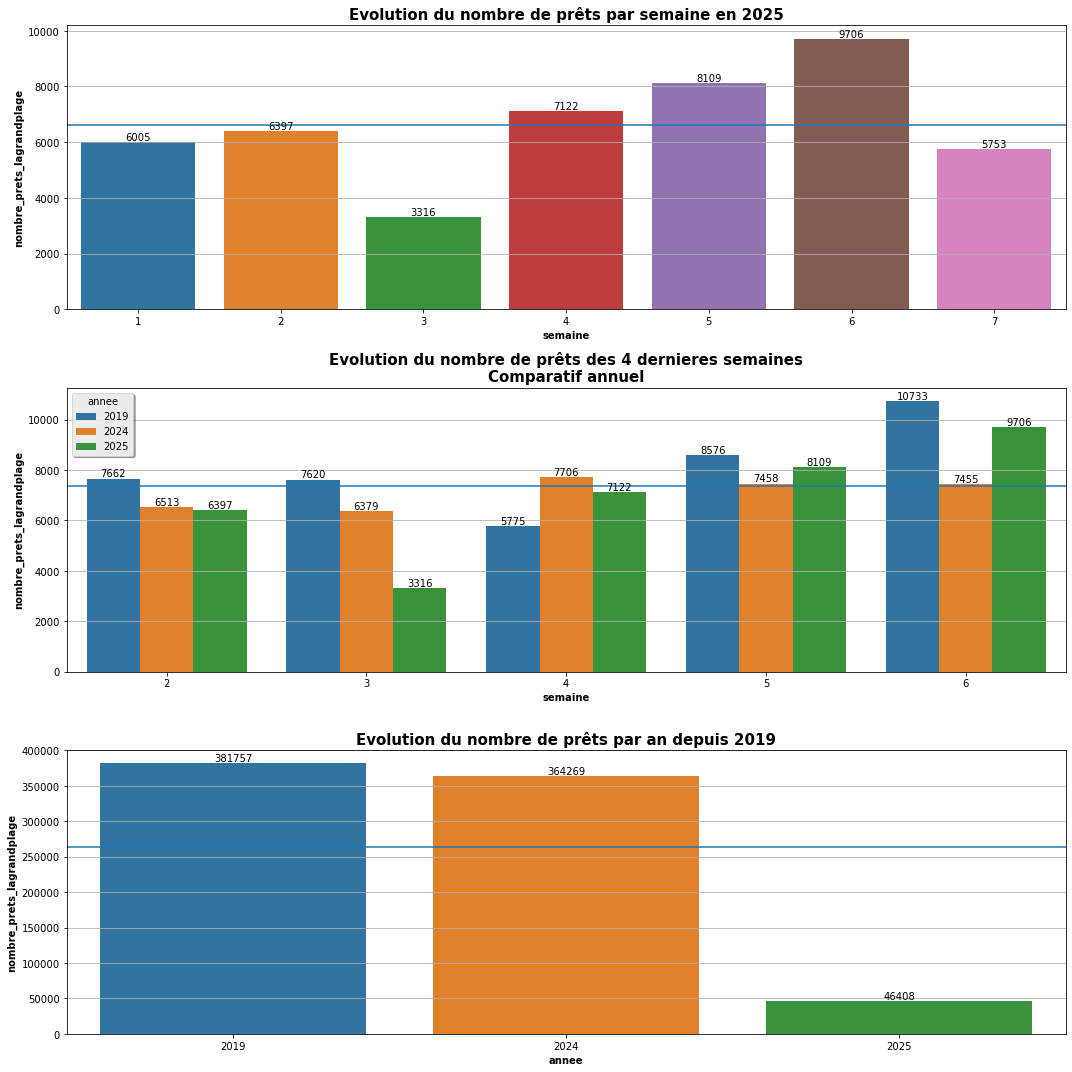

In [9]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))
#1er graphique
sns.barplot(data=df.evolution_byweek_thisyear(),x='semaine',y='nombre_prets_lagrandplage',ax=ax[0])
ax[0].axhline(y=df1["nombre_prets_lagrandplage"].mean())
ax[0].set_title(df.titre_graph1())
for i in ax[0].containers:
    ax[0].bar_label(i,)
#2e graphique
sns.barplot(data=df.evolution_4lastweek(),x='semaine',y='nombre_prets_lagrandplage',hue='annee',ax=ax[1])
ax[1].axhline(y=df2["nombre_prets_lagrandplage"].mean())
ax[1].set_title(df.titre_graph2())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df.evolution_by_year(),x='annee',y='nombre_prets_lagrandplage',ax=ax[2])
ax[2].axhline(y=df3['nombre_prets_lagrandplage'].mean())
ax[2].set_title(df.titre_graph3())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()

# Nombre d'usagers distincts utilisant le service de prêts

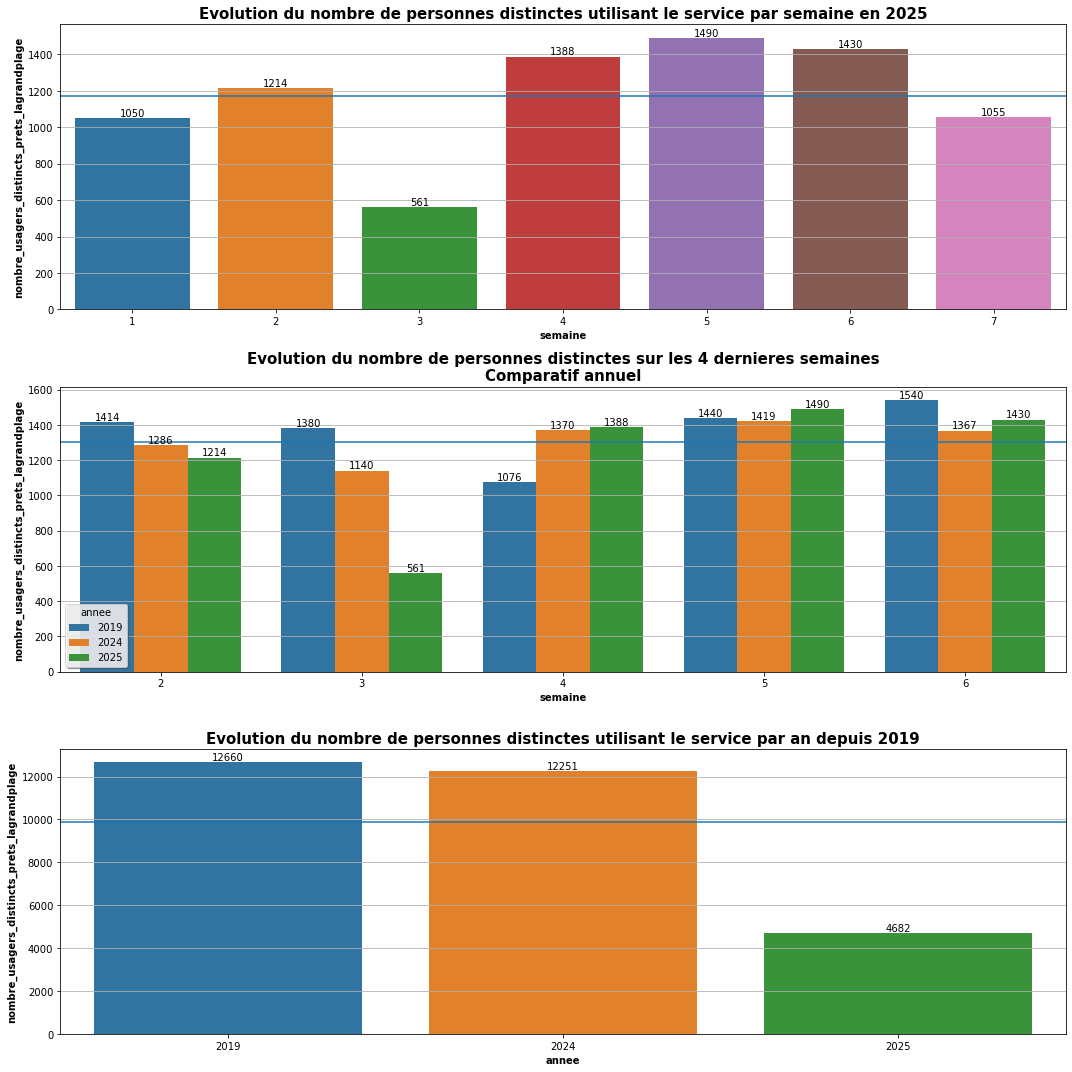

In [10]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))

sns.barplot(data=df.distinct_evolution_byweek_thisyear(),x='semaine',y='nombre_usagers_distincts_prets_lagrandplage',ax=ax[0])
ax[0].axhline(y=df4["nombre_usagers_distincts_prets_lagrandplage"].mean())
ax[0].set_title(df.titre_graph4())
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(data=df.distinct_evolution_4lastweek(),x='semaine',y='nombre_usagers_distincts_prets_lagrandplage',hue='annee',ax=ax[1])
ax[1].axhline(y=df5["nombre_usagers_distincts_prets_lagrandplage"].mean())
ax[1].set_title(df.titre_graph5())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df.distinct_evolution_by_year(),x='annee',y='nombre_usagers_distincts_prets_lagrandplage',ax=ax[2])
ax[2].axhline(y=df6["nombre_usagers_distincts_prets_lagrandplage"].mean())
ax[2].set_title(df.titre_graph6())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()